In [14]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ObjectDetector

In [15]:
url = 'https://autogluon.s3.amazonaws.com/datasets/tiny_motorbike.zip'
dataset_train = ObjectDetector.Dataset.from_voc(url, splits='trainval')
# or load from coco format, skip as it's too big to download
# dataset_train = ObjectDetector.Dataset.from_coco(annotation_json_file, root='/path/to/root')

tiny_motorbike/
├── Annotations/
├── ImageSets/
└── JPEGImages/


In [21]:
dataset_train.rois[0]

[{'class': 'motorbike',
  'xmin': 0.702,
  'ymin': 0.36533333333333334,
  'xmax': 0.998,
  'ymax': 0.9973333333333333,
  'difficult': 0},
 {'class': 'motorbike',
  'xmin': 0.208,
  'ymin': 0.0,
  'xmax': 0.852,
  'ymax': 0.6506666666666666,
  'difficult': 0},
 {'class': 'person',
  'xmin': 0.828,
  'ymin': 0.16,
  'xmax': 0.928,
  'ymax': 0.5173333333333333,
  'difficult': 1}]

In [3]:
df = ImageDataset.from_csv(csv_file, root='/home/ubuntu')
df.head()

,image,PetID,label
0,/home/ubuntu/petfinder_data/train_images/015da...,015da9e87,0
1,/home/ubuntu/petfinder_data/train_images/02260...,022606901,0
2,/home/ubuntu/petfinder_data/train_images/02f89...,02f89bdcb,0
3,/home/ubuntu/petfinder_data/train_images/03f21...,03f217352,0
4,/home/ubuntu/petfinder_data/train_images/040a9...,040a9a6f9,0


In a future release ObjectDetector may be entirely reworked to use Torch as a backend.
This future change will likely be API breaking.Users should ensure they update their code that depends on ObjectDetector when upgrading to future AutoGluon releases.
For more information, refer to ObjectDetector refactor GitHub issue: https://github.com/awslabs/autogluon/issues/1559

The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Randomly split train_data into train[150]/validation[20] splits.
Starting HPO experiments


  0%|          | 0/2 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.dataset         voc_tiny != auto
root.valid.batch_size 16 != 8
root.ssd.base_network vgg16_atrous != resnet50_v1
root.ssd.data_shape  300 != 512
root.gpus            (0, 1, 2, 3) != (0,)
root.num_workers     4 != 12
root.train.early_stop_patience -1 != 10
root.train.seed      233 != 125
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    20 != 5
root.train.batch_size 16 != 8
root.dataset_root    ~/.mxnet/datasets/ != auto
}
Saved config to /home/kate/PycharmProjects/object_detection/4b92a8f8/.trial_0/config.yaml
[12:47:40] ../src/imperative/./imperative_utils.h:93: GPU support is disabled. Compile MXNet with USE_CUDA=1 to enable GPU support.
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[Epoch 0] Training cost: 77.121650, CrossEnt


100%|███████████████████████████████████| 57421/57421 [00:06<00:00, 9290.84KB/s]
[12:55:23] ../src/imperative/./imperative_utils.h:93: GPU support is disabled. Compile MXNet with USE_CUDA=1 to enable GPU support.
Saving Training Curve in checkpoint/plot_training_curves.png


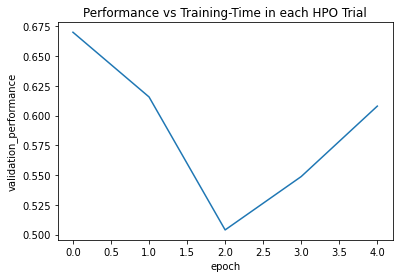

Finished, total runtime is 469.38 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 12,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.

In [6]:
time_limit = 60*30  # at most 0.5 hour
detector = ObjectDetector()
hyperparameters = {'epochs': 5, 'batch_size': 8}
hyperparameter_tune_kwargs={'num_trials': 2}
detector.fit(dataset_train, time_limit=time_limit, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)


In [7]:
dataset_test = ObjectDetector.Dataset.from_voc(url, splits='test')

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][-1]))

tiny_motorbike/
├── Annotations/
├── ImageSets/
└── JPEGImages/
mAP on test dataset: 0.09646369712159186


In [8]:
image_path = dataset_test.iloc[0]['image']
result = detector.predict(image_path)
print(result)

   predict_class  predict_score  \
0         person       0.992640   
1      motorbike       0.897463   
2      motorbike       0.344450   
3    pottedplant       0.159241   
4            car       0.149456   
..           ...            ...   
73           car       0.026023   
74        person       0.025850   
75        person       0.024818   
76        person       0.024726   
77        person       0.024694   

                                         predict_rois  
0   {'xmin': 0.4028904438018799, 'ymin': 0.2766634...  
1   {'xmin': 0.3267401158809662, 'ymin': 0.4470330...  
2   {'xmin': 0.3830264210700989, 'ymin': 0.3369398...  
3   {'xmin': 0.32188543677330017, 'ymin': 0.460177...  
4   {'xmin': 0.0, 'ymin': 0.6232168674468994, 'xma...  
..                                                ...  
73  {'xmin': 0.3173879384994507, 'ymin': 0.4602524...  
74  {'xmin': 0.7014878392219543, 'ymin': 0.7525864...  
75  {'xmin': 0.909260630607605, 'ymin': 0.75465017...  
76  {'xmin': 0.0032

In [9]:
dataset_train

,image,rois,image_attr
0,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'motorbike', 'xmin': 0.702, 'ymin':...","{'width': 500.0, 'height': 375.0}"
1,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'motorbike', 'xmin': 0.117117117117...","{'width': 333.0, 'height': 500.0}"
2,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'person', 'xmin': 0.102, 'ymin': 0....","{'width': 500.0, 'height': 432.0}"
3,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'motorbike', 'xmin': 0.226, 'ymin':...","{'width': 500.0, 'height': 375.0}"
4,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'motorbike', 'xmin': 0.357357357357...","{'width': 333.0, 'height': 500.0}"
...,...,...,...
165,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'motorbike', 'xmin': 0.0, 'ymin': 0...","{'width': 500.0, 'height': 333.0}"
166,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'person', 'xmin': 0.408, 'ymin': 0....","{'width': 500.0, 'height': 375.0}"
167,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'person', 'xmin': 0.382, 'ymin': 0....","{'width': 500.0, 'height': 375.0}"
168,/home/kate/.gluoncv/datasets/tiny_motorbike/ti...,"[{'class': 'motorbike', 'xmin': 0.272, 'ymin':...","{'width': 500.0, 'height': 375.0}"


In [12]:
list(dataset_train.rois[0])

[{'class': 'motorbike',
  'xmin': 0.702,
  'ymin': 0.36533333333333334,
  'xmax': 0.998,
  'ymax': 0.9973333333333333,
  'difficult': 0},
 {'class': 'motorbike',
  'xmin': 0.208,
  'ymin': 0.0,
  'xmax': 0.852,
  'ymax': 0.6506666666666666,
  'difficult': 0},
 {'class': 'person',
  'xmin': 0.828,
  'ymin': 0.16,
  'xmax': 0.928,
  'ymax': 0.5173333333333333,
  'difficult': 1}]

In [13]:
dataset_train.to_csv('example.csv')